In [195]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.fftpack import fft, ifft
from scipy.stats import norm

In [196]:
plt.style.use('dark_background')

# point #1

In [197]:
A = 1
N = 600
fmax = 10000
T = 1.0/fmax

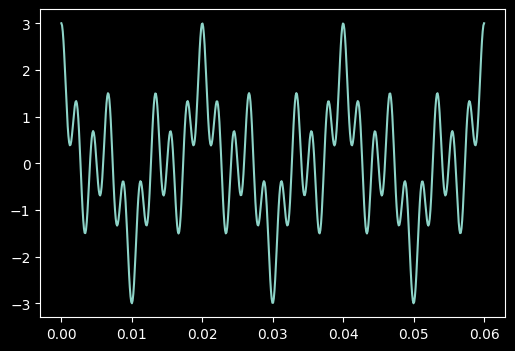

In [198]:
def func(A, x, f):
    w = 2*f*np.pi
    return A*np.cos(w*x)

x = np.linspace(0, N * T, N)
y = func(A, x, 50) + func(A, x, 150) + func(A, x, 450)

fig = plt.figure(figsize=(6, 4))
plt.plot(x, y)

(0.0, 500.0)

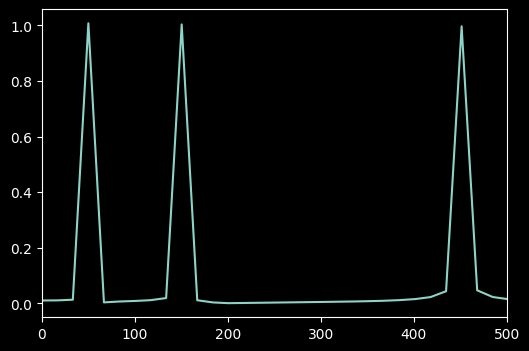

In [199]:
xf = np.linspace(0.0, fmax/2, N//2)
yf = np.fft.fft(y)

fig = plt.figure(figsize=(6, 4))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim([0,500])

# point #2
# Фильтр низких частот - фильтр Баттерворта

(0.0, 500.0)

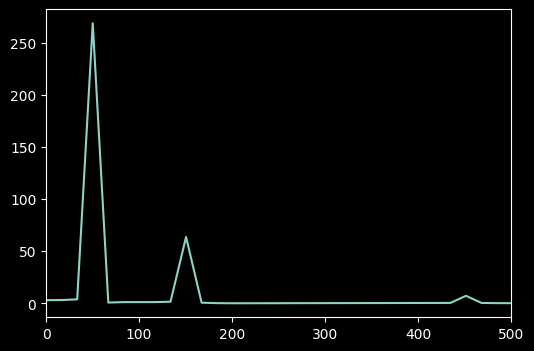

In [200]:
# фильтр Баттерворта нижних частот 2 порядка
def low_pass_filter(w, wc):
  return wc**2 / ((-w**2) + (1j) * math.sqrt(2) * wc * w + wc**2)

yyf = yf[0:N//2] * low_pass_filter(xf, 70)

fig = plt.figure(figsize=(6, 4))
plt.plot(xf, abs(yyf))
plt.xlim([0, 500])

(0.0, 80.0)

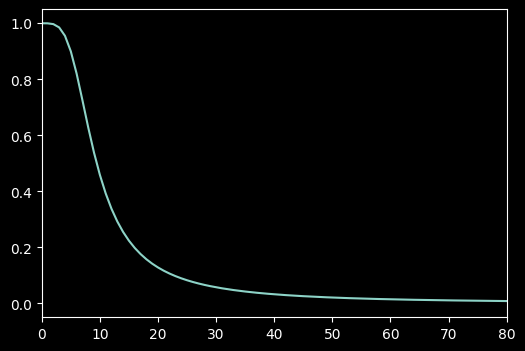

In [201]:
xfm = np.linspace(0.0, fmax, N)
s = low_pass_filter(xfm, 120)

fig = plt.figure(figsize=(6, 4))
plt.plot(abs(s))
plt.xlim(0, 80)

c:\Users\4xev4\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 400.0)

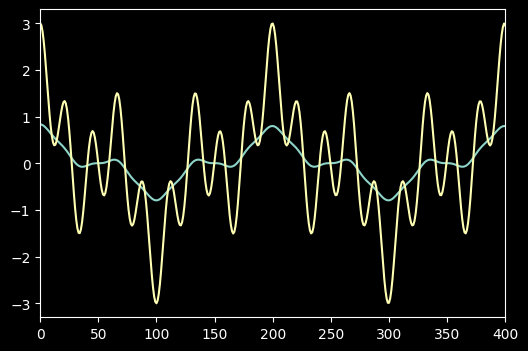

In [202]:
yyfm = fft(y) * abs(low_pass_filter(xfm, 120))
yf1m = ifft(yyfm)

fig = plt.figure(figsize=(6, 4))
plt.plot(yf1m)
plt.plot(y)
plt.xlim(0, 400)

# point #3
# Фильтр высоких частот

(0.0, 500.0)

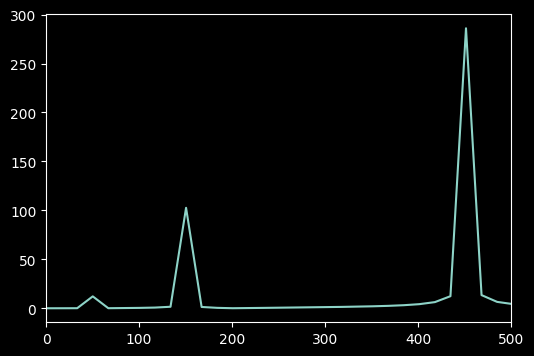

In [203]:
# фильтр высоких частот
def high_pass_filter(w, wc):
  return w**2 / ((-wc**2) + (1j) * np.sqrt(2) * wc * w + w**2)

y2f = yf[0:N//2] * high_pass_filter(xf, 250)

fig = plt.figure(figsize=(6, 4))
plt.plot(xf, abs(y2f))
plt.xlim([0, 500])

(0.0, 80.0)

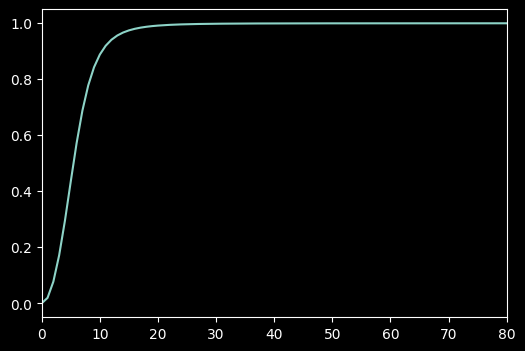

In [204]:
xfm = np.linspace(0.0, fmax, N)
s = high_pass_filter(xfm, 120)

fig = plt.figure(figsize=(6, 4))
plt.plot(abs(s))
plt.xlim(0, 80)

(0.0, 400.0)

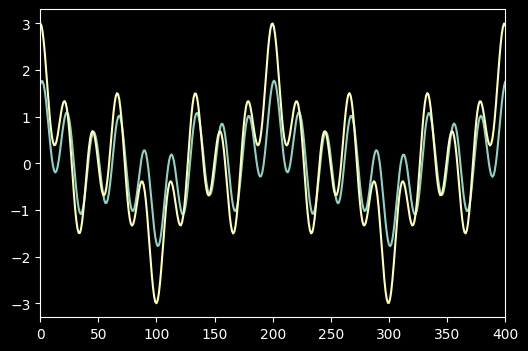

In [205]:
xfm = np.linspace(0.0, fmax, N)
yyfm = fft(y) * high_pass_filter(xfm, 250)
yf1m = ifft(yyfm)

fig = plt.figure(figsize=(6, 4))
plt.plot(yf1m)
plt.plot(y)
plt.xlim(0, 400)

# point #4
# Полосовой и заграждающий фильтры

(0.0, 500.0)

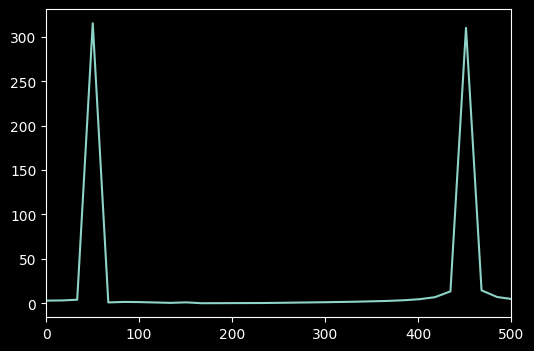

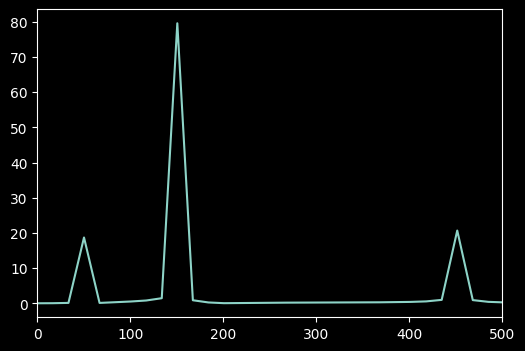

In [206]:
# полосовой фильтр
def band_pass_filter(w, wc, wcc):
  return low_pass_filter(w, wc) * high_pass_filter(w, wcc)

def stop_filter(w, wc, wcc):
  return -(low_pass_filter(w, wc) - high_pass_filter(w, wcc))**2

y3ff = yf[0:N//2] * stop_filter(xf, 120, 200)
y3f  = yf[0:N//2] * band_pass_filter(xf, 120, 200)

fig = plt.figure(figsize=(6, 4))
plt.plot(xf, abs(y3ff))
plt.xlim([0, 500])

fig = plt.figure(figsize=(6, 4))
plt.plot(xf, abs(y3f))
plt.xlim([0, 500])

(0.0, 80.0)

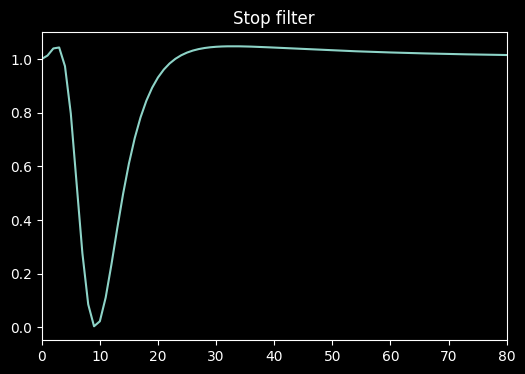

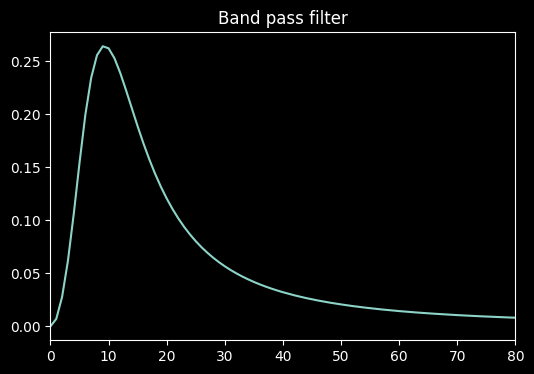

In [207]:
xfm = np.linspace(0.0, fmax, N)
s  = band_pass_filter(xfm, 120, 200)
ss = stop_filter(xfm, 120, 200)

fig = plt.figure(figsize=(6, 4))
plt.title('Stop filter')
plt.plot(abs(ss))
plt.xlim(0, 80)

fig = plt.figure(figsize=(6, 4))
plt.title('Band pass filter')
plt.plot(abs(s))
plt.xlim(0, 80)

(0.0, 300.0)

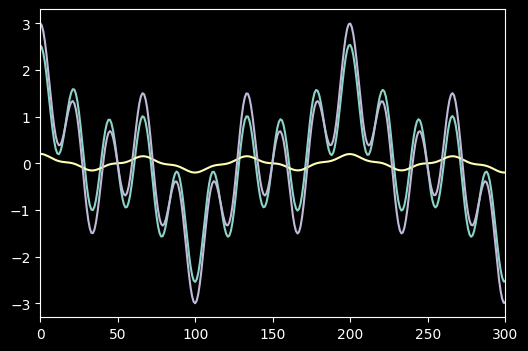

In [208]:
xfm = np.linspace(0.0, fmax, N)
yyfm  = fft(y) * abs(band_pass_filter(xfm, 120, 200))
yyffm = fft(y) * abs(stop_filter(xfm, 120, 200))
yf1m  = ifft(yyfm)
yff1m = ifft(yyffm)

fig = plt.figure(figsize=(6, 4))
plt.plot(yff1m)
plt.plot(yf1m)
plt.plot(y)
plt.xlim(0, 300)

# point #5
# Фильтр Баттерворта любого порядка

(0.0, 500.0)

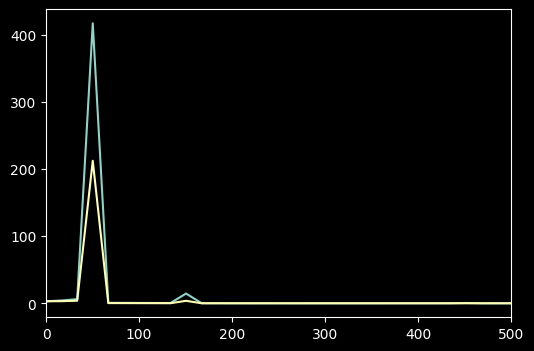

In [209]:
def buttern(w, wc, n, roots):
    p = 1
    for i in range (0,n):
        p = p * (1j*(w/wc) - roots[i])
    omega = 1 / p
    return omega

roots = np.roots([1, 0, 0, 0, 0, 0, 0, 0, 1])

xf_5 = buttern(xf, 50, 3, roots)
xf1_5 = buttern(xf, 50, 4, roots)
yf_5 = yf[0:N//2] * xf_5
yf1_5 = yf[0:N//2] * xf1_5

fig = plt.figure(figsize=(6, 4))
plt.plot(xf, abs(yf_5))
plt.plot(xf, abs(yf1_5))
plt.xlim([0, 500])

(0.0, 500.0)

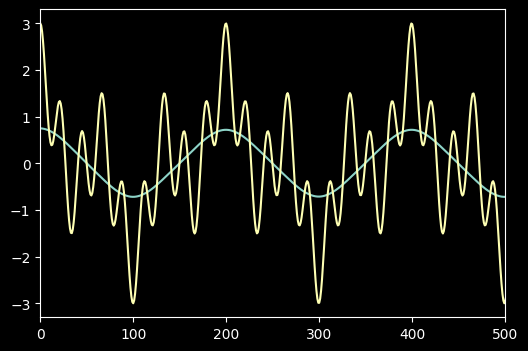

In [210]:
xfm = np.linspace(0.0, fmax, N)
yyfm = fft(y) * abs(buttern(xfm, 50, 3, roots))
yf1m = ifft(yyfm)

fig = plt.figure(figsize=(6, 4))
plt.plot(yf1m)
plt.plot(y)
plt.xlim(0, 500)

# point #6
# Зашумленный сигнал

(0.0, 500.0)

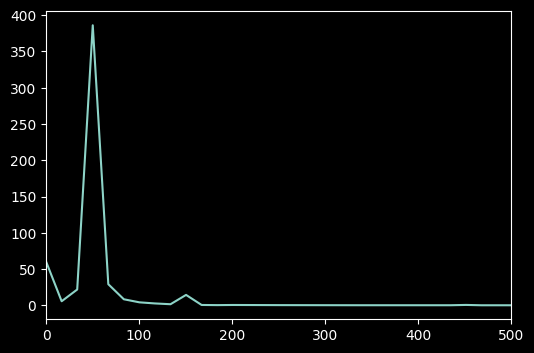

In [211]:
noise = np.random.normal(0,1,x.shape)
y_noise = y + noise[0:600]
yff_noise = fft(y_noise)
f_noise_filt = yff_noise[0:N//2] * buttern(xf, 50, 3, roots)

fig = plt.figure(figsize=(6, 4))
plt.plot(xf, abs(f_noise_filt))
plt.xlim([0,500])

c:\Users\4xev4\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 400.0)

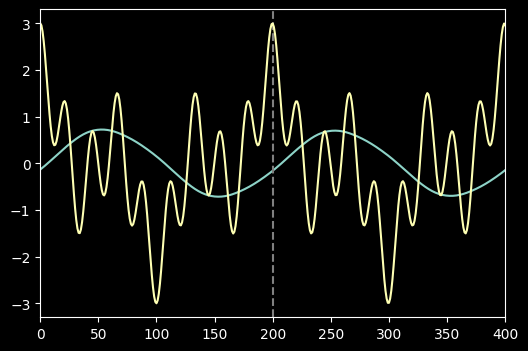

In [213]:
xfm = np.linspace(0, fmax, N)
yyfm = fft(y) * buttern(xfm, 50, 3, roots)
yf1m = ifft(yyfm)

fig = plt.figure(figsize=(6, 4))
plt.plot(yf1m)
plt.axvline(x=200, color='grey', linestyle='--')
plt.plot(y)
plt.xlim(0, 400)